# UNSUPERVISED MACHINE LEARNING - REDUCED

## Contents:
1. Import libraries and data (reduced data and pleasant weather answers data)
2. Import reduced data (PCA).
3. Dendrograms (Single, complete and WARD method)

### 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
# Define path for where data is stored
path = r'C:\Users\Administrator\Documents\data analytics\Machine Learning\ClimateWins\Data Sets'

In [3]:
# Import the weather data that was already scaled. 
climate = pd.read_csv(os.path.join(path, 'data_scaled.csv'))

In [4]:
climate.head(3)

,Unnamed: 0,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE
0,0,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,...,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237,19600101
1,1,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,...,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141,19600102
2,2,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,...,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078,19600103


In [5]:
climate= climate.drop('Unnamed: 0', axis = 1)

In [6]:
climate.head(3)

,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max,DATE
0,-1.599964,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,-0.179228,-0.902918,-0.528623,...,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237,19600101
1,-1.599964,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,-0.179228,-0.810126,-0.582946,...,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141,19600102
2,-1.599964,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,-0.179228,-1.065304,-0.257010,...,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078,19600103


In [7]:
climate.shape

(22950, 170)

### 2. Import reduced data

In [8]:
reduced =  pd.read_csv (os.path.join(path, '2000_PCA.csv'), index_col = False)
reduced

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,-12.303670,3.984468,4.650371,1.626903,-0.087554,-1.439353,-1.826198,-1.942304,1.901166
1,-11.275915,4.828021,4.950137,0.249943,-1.038258,-0.249952,-0.857263,-0.264164,1.678914
2,-10.795703,3.593919,4.657376,-2.800168,0.461898,0.555462,0.453382,0.976426,-0.300677
3,-9.744379,2.305812,3.686662,-2.348202,2.362939,-1.425954,1.029055,2.934832,0.312609
4,-10.362477,3.885228,0.191965,-2.644560,-3.067238,-0.270308,0.628176,-0.284416,-0.077673
...,...,...,...,...,...,...,...,...,...
361,-11.870624,-8.194647,-5.335100,2.347469,-0.841473,-3.807072,-3.878817,1.418181,1.924888
362,-12.631110,-7.532162,-6.400491,2.044389,-1.351738,-0.835748,-4.023749,1.193028,1.291244
363,-13.192649,-6.635848,-6.397488,3.033823,-0.821675,-0.091561,-2.248851,1.522177,-1.009005
364,-13.195805,-3.368171,-3.938788,3.934247,1.822820,-0.547590,-4.354749,0.031681,2.953673


### 3. Dendrogram with Reduced Dataset

SINGLE METHOD

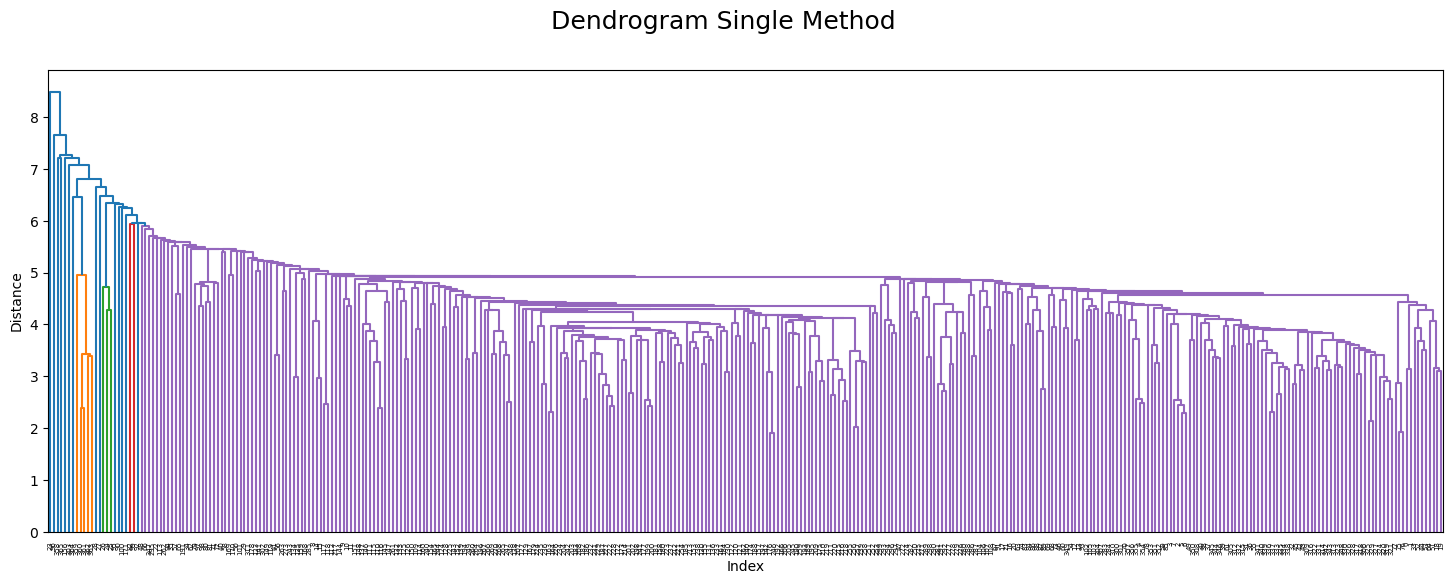

In [10]:
distance_single = linkage(reduced.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method",fontsize=18)
plt.show()

COMPLETE METHOD

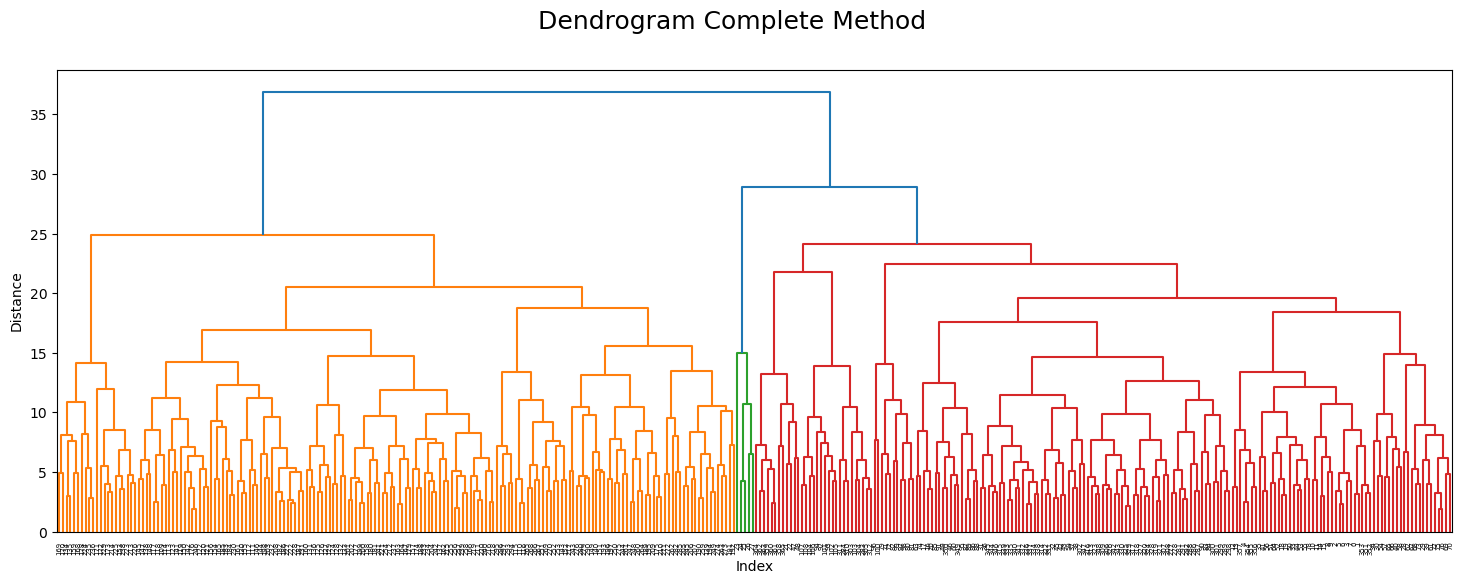

In [11]:
distance_single = linkage(reduced.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method",fontsize=18)
plt.show()

AVERAGE METHOD

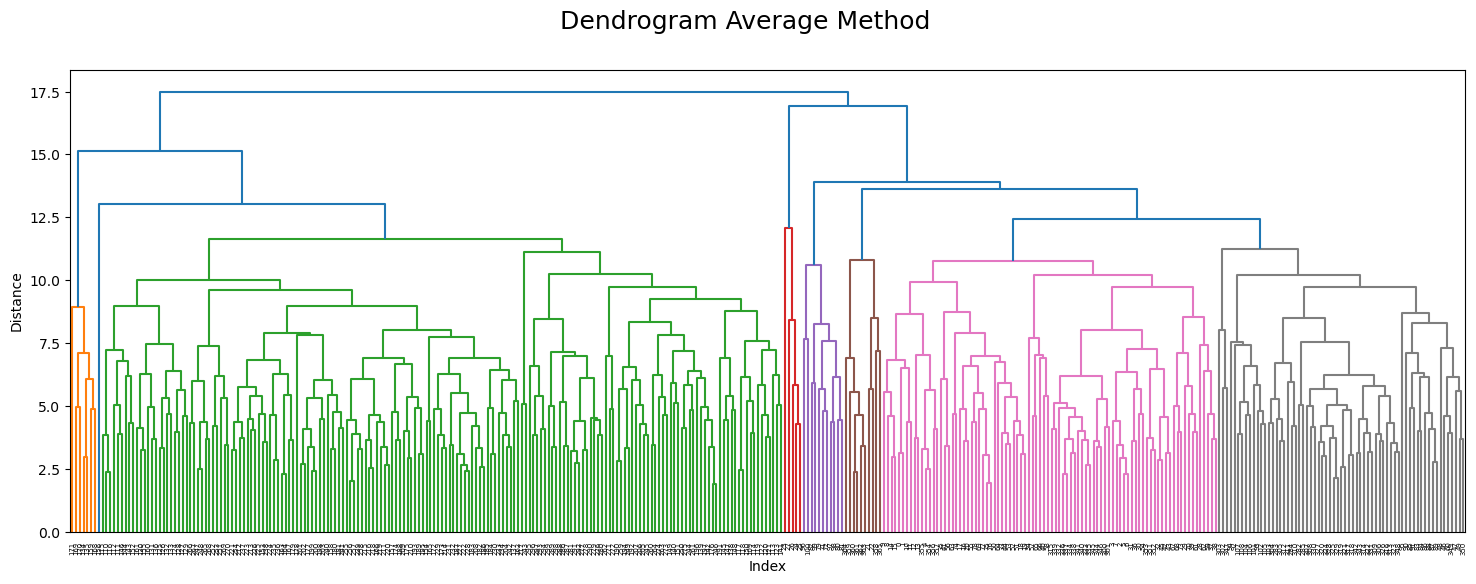

In [12]:
distance_single = linkage(reduced.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method",fontsize=18)
plt.show()

WARD METHOD

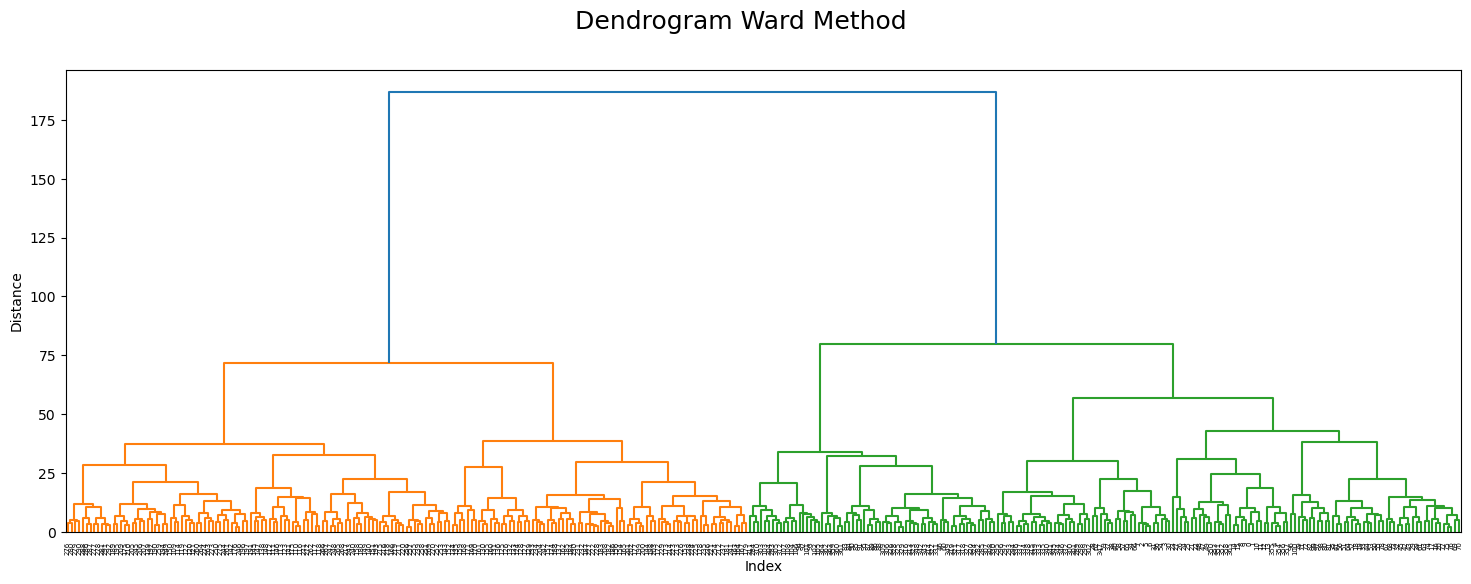

In [13]:
distance_single = linkage(reduced.loc[:,
['PCA1',
'PCA2',
'PCA3',
'PCA4',
'PCA5',
'PCA6',
'PCA7',
'PCA8',
'PCA9']],method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method",fontsize=18)
plt.show()